In [1]:
from __future__ import division
import numpy as np
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [4]:
#time step & setup - as in the lectures
N = 40000
t1 = 0
t2 = 1.5
t = np.linspace(t1,t2,N)
h = (t2-t1)/float(N)
y = np.zeros((np.size(t),4))
# initial conditions
a = 1.0
e = 0.00
GM = 4.0*(np.pi)**2
x_0 = 0.0
y_0 = a*(1 - e)
u_0 = -np.sqrt((GM/float(a))*((1+e)/(1-e)))
v_0 = 0

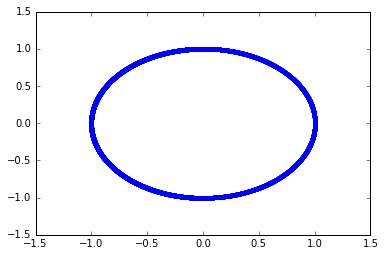

In [5]:
def f_x(u):   # dx/dt = u
        return u
def f_y(v):   # dy/dt = v
        return v
def f_u(x, r):   # du/dt = -(GM/r^3)x
        return -(GM/(r**3))*x
def f_v(y, r):   # dv/dt = -(GM/r^3)y
        return -(GM/(r**3))*y

def modified_euler(x_0, y_0, u_0, v_0):
    x_list = [x_0]
    y_list = [y_0]
    u_list = [u_0]
    v_list = [v_0]
    for i in range(len(t)):
        x = x_list[-1]
        y = y_list[-1]
        u = u_list[-1]
        v = v_list[-1]
        
        r = np.sqrt(x**2 + y**2)
        
        k0x = h*f_x(u)
        k0y = h*f_y(v)
        k0u = h*f_u(x, r)
        k0v = h*f_v(y, r)
        
        k1x = h*f_x(u + 0.5*k0x)
        k1y = h*f_y(v + 0.5*k0y)
        k1u = h*f_u(x + 0.5*k0u, r)
        k1v = h*f_v(y + 0.5*k0v, r)
    
        x_list.append(x + k1x)
        y_list.append(y + k1y)
        u_list.append(u + k1u)
        v_list.append(v + k1v)
    
    return x_list, y_list

res_x, res_y = modified_euler(x_0, y_0, u_0, v_0)

plt.plot(res_x, res_y, '.')
        